In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy import stats 

#data from https://openjustice.doj.ca.gov/data
#do the number of violent crimes in a city affect home prices?

In [2]:
file_one = Path("csv_data/ca_crimes.csv")
file_one_df = pd.read_csv(file_one)

file_two = Path("csv_data/clear_ca_sfh1.csv")
file_two_df = pd.read_csv(file_two)

file_one_df.head()

C:\Users\Eric\AppData\Local\Temp\ipykernel_11584\1115269127.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  file_one_df = pd.read_csv(file_one)


,Year,County,NCICCode,Month,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum,Property_sum,...,MVPLARnao_sum,BILARnao_sum,FBLARnao_sum,COMLARnao_sum,AOLARnao_sum,LT400nao_sum,LT200400nao_sum,LT200nao_sum,LT50200nao_sum,LT50nao_sum
0,2013,Alameda County,Alameda Co. Sheriff's Department,1,48,0,1,20,27,237,...,2,2,0,0,34,40.0,14.0,NaN,12,34
1,2013,Alameda County,Alameda Co. Sheriff's Department,2,54,1,1,13,39,219,...,7,0,1,0,31,33.0,13.0,NaN,8,30
2,2013,Alameda County,Alameda Co. Sheriff's Department,3,65,1,2,22,40,185,...,6,3,0,0,26,36.0,5.0,NaN,7,19
3,2013,Alameda County,Alameda Co. Sheriff's Department,4,42,0,2,16,24,224,...,4,1,2,0,39,33.0,19.0,NaN,11,34
4,2013,Alameda County,Alameda Co. Sheriff's Department,5,43,0,0,13,30,258,...,2,1,1,0,37,30.0,17.0,NaN,10,29


In [3]:
crime_df = file_one_df[["Year","NCICCode","Violent_sum","Property_sum"]]
crime_df.head()

,Year,NCICCode,Violent_sum,Property_sum
0,2013,Alameda Co. Sheriff's Department,48,237
1,2013,Alameda Co. Sheriff's Department,54,219
2,2013,Alameda Co. Sheriff's Department,65,185
3,2013,Alameda Co. Sheriff's Department,42,224
4,2013,Alameda Co. Sheriff's Department,43,258


In [4]:
crime_df["Year"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [5]:
filtered_df = crime_df[~crime_df['Year'].between(1985, 2014)]
filtered_df.head()

,Year,NCICCode,Violent_sum,Property_sum
528,2015,Alameda Co. Sheriff's Department,34,168
529,2015,Alameda Co. Sheriff's Department,48,178
530,2015,Alameda Co. Sheriff's Department,41,167
531,2015,Alameda Co. Sheriff's Department,32,181
532,2015,Alameda Co. Sheriff's Department,42,166


In [6]:
filtered_df["NCICCode"].unique()

array(["Alameda Co. Sheriff's Department", 'Alameda', 'Albany',
       'Berkeley', 'Emeryville', 'Fremont', 'Hayward', 'Livermore',
       'Newark', 'Oakland', 'Piedmont', 'Pleasanton', 'San Leandro',
       'Union City', 'Alameda E. Bay Reg. Park Dist.', 'CSU East Bay',
       'Union Pacific RR - Alameda', 'Alameda BART', 'Dublin',
       'Alameda E. Bay Mun. Util. Dist.', 'UC Berkeley',
       'CA Highway Patrol - Alameda', 'Diablo Range DPR',
       "Alpine Co. Sheriff's Department", 'CA Highway Patrol - Alpine',
       "Amador Co. Sheriff's Department", 'Ione', 'Jackson',
       'Sutter Creek', 'Union Pacific RR - Amador',
       'CA Highway Patrol - Amador', "Butte Co. Sheriff's Department",
       'Biggs', 'Chico', 'Gridley', 'Oroville', 'Paradise',
       'Union Pacific RR - Butte', 'Northern Buttes DPR', 'CSU Chico',
       'CA Highway Patrol - Butte', "Calaveras Co. Sheriff's Department",
       'Angels Camp', 'Union Pacific RR - Calaveras', 'Calaveras DPR',
       'CA Highway

In [7]:
filtered_df = pd.DataFrame(filtered_df)

In [8]:
filtered_df.drop(filtered_df[filtered_df['NCICCode'].isin(["Alameda Co. Sheriff's Department",
                             "Alameda E. Bay Reg. Park Dist.","CSU East Bay", "Union Pacific RR - Alameda", 
                             "Alameda BART", "Alameda E. Bay Mun. Util. Dist.","UC Berkeley",
                             "CA Highway Patrol - Alameda", 'Diablo Range DPR',"Alpine Co. Sheriff's Department", 
                             'CA Highway Patrol - Alpine',"Amador Co. Sheriff's Department", 'Union Pacific RR - Amador',
                             'CA Highway Patrol - Amador', "Butte Co. Sheriff's Department",'Union Pacific RR - Butte', 
                             'Northern Buttes DPR', 'CSU Chico','CA Highway Patrol - Butte', 
                             "Calaveras Co. Sheriff's Department", 'Angels Camp', 'Union Pacific RR - Calaveras', 
                             'Calaveras DPR', 'CA Highway Patrol - Calaveras', "Colusa Co. Sheriff's Department",
                             'Union Pacific RR - Colusa','CA Highway Patrol - Colusa', "Contra Costa Co. Sheriff's Department",
                             'Contra Costa E. Bay Reg. Park Dist.', 'Contra Costa BART', 'Contra Costa Community College',
                             'Union Pacific RR - Contra Costa','CA Highway Patrol - Contra Costa',
                             "Del Norte Co. Sheriff's Department",'CA Highway Patrol - Del Norte',
                             "El Dorado Co. Sheriff's Department",'Union Pacific RR - El Dorado',
                             'CA Highway Patrol - El Dorado', "Fresno Co. Sheriff's Department",
                             'State Center Community College','Union Pacific RR - Fresno', 'San Joaquin DPR', 
                             'CSU Fresno','CA Highway Patrol - Fresno', 'Coalinga State Hospital',
                             'Clovis Unified School', "Glenn Co. Sheriff's Department",'Union Pacific RR - Glenn',
       'CA Highway Patrol - Glenn', "Humboldt Co. Sheriff's Department",'CSU Humboldt (Arcata)', 'Union Pacific RR - Humboldt',
       'Northern Coast Redwoods DPR', 'CA Highway Patrol - Humboldt',
       "Imperial Co. Sheriff's Department",'Union Pacific RR - Imperial', 'CA Highway Patrol - Imperial',
       "Inyo Co. Sheriff's Department",'Union Pacific RR - Inyo', 'CA Highway Patrol - Inyo',
       "Kern Co. Sheriff's Department",'Union Pacific RR - Kern', 'CSU Bakersfield',
       'CA Highway Patrol - Kern', 'Kern High School District',
       "Kings Co. Sheriff's Department", 'Union Pacific RR - Kings', 'Porterville Developmental Center','CA Highway Patrol - Kings',
       "Lake Co. Sheriff's Department",'Union Pacific RR - Lassen',
       'CA Highway Patrol - Lassen',
       "Los Angeles Co. Sheriff's Department",'Union Pacific RR - Los Angeles',
       'Metropolitan Trans. Authority (MTA)',
       'Pasadena Community College', 'Lanterman Developmental Center', 'Cal Poly - Pomona', 'CSU Dominguez Hills',
       'CSU Long Beach', 'CSU Los Angeles', 'CSU Northridge','UC Los Angeles',
       'CA Highway Patrol - Los Angeles', 'Metropolitan State Hospital',
       'Baldwin Park School', "Madera Co. Sheriff's Department",'CA Highway Patrol - Mariposa',
       "Mendocino Co. Sheriff's Department",'Mendocino DPR', 'Union Pacific RR - Mendocino',
       'CA Highway Patrol - Mendocino', "Merced Co. Sheriff's Department",'Union Pacific RR - Merced', 'Four Rivers DPR',
       'UC Merced', 'CA Highway Patrol - Merced',
       "Modoc Co. Sheriff's Department",'Union Pacific RR - Modoc', 'CA Highway Patrol - Modoc',
       "Mono Co. Sheriff's Department",'CA Highway Patrol - Mono', "Monterey Co. Sheriff's Department",'Monterey Airport',
       'Union Pacific RR - Monterey', 'Monterey DPR', 'CSU Monterey Bay',
       'CA Highway Patrol - Monterey', "Napa Co. Sheriff's Department",'St. Helena', 'Union Pacific RR - Napa',
       'Napa State Hospital','CA Highway Patrol - Napa', "Nevada Co. Sheriff's Department",
                            'Union Pacific RR - Nevada', 'CA Highway Patrol - Nevada',
       "Orange Co. Sheriff's Department", 'CSU Fullerton', 'Union Pacific RR - Orange',
       'Orange Coast DPR', 'Fairview Developmental Center',
       'UC Irvine', 'CA Highway Patrol - Orange',
       'Irvine Valley College', "Placer Co. Sheriff's Department", 'Sierra DPR',
       'Union Pacific RR - Placer', 'CA Highway Patrol - Placer',
       "Plumas Co. Sheriff's Department", 'Union Pacific RR - Plumas',
       'CA Highway Patrol - Plumas', "Riverside Co. Sheriff's Department",
       'Union Pacific RR - Riverside', 'Inland Empire DPR',
       'Riverside Community College','UC Riverside', 'CA Highway Patrol - Riverside', 
       'Mount San Jacinto Community College',
       "Sacramento Co. Sheriff's Department",'CSU Sacramento', 'Gold Fields DPR',
       'Twin Rivers Unified School', 'CA State Fair', 'Capital DPR',
       'Twin Cities DPR', 'Union Pacific RR - Sacramento',
       'UC Med Center Sacramento',
       'CA Highway Patrol - Sacramento',
       "San Benito Co. Sheriff's Department",
       'Union Pacific RR - San Benito', 'Hollister Hills DPR',
       'CA Highway Patrol - San Benito',
       "San Bernardino Co. Sheriff's Department", 
       'CSU San Bernardino', 'San Bernardino Unified School',
       'San Bernardino College', 'Fontana Unified School', 'Union Pacific RR - San Bernardino',
       'Patton State Hospital', 'Tehachapi DPR',
       'CA Highway Patrol - San Bernardino', 'Chaffey College',
       "San Diego Co. Sheriff's Department", 'CSU San Diego', 'San Diego Harbor', 'Colorado DPR',
       'Ocotillo Wells DPR', 'San Diego Coast DPR', 'CSU San Marcos',
       'UC San Diego', 'CA Highway Patrol - San Diego', 
       'CSU San Francisco', 'San Francisco BART',
       'UC Hastings College of Law', 'Union Pacific RR - San Francisco',
       'UC San Francisco', 'CA Highway Patrol - San Francisco',
       "San Joaquin Co. Sheriff's Department", 'Stockton Unified School',
       'Union Pacific RR - San Joaquin',
       'CA Highway Patrol - San Joaquin', 'San Joaquin Delta College',
       "San Luis Obispo Co. Sheriff's Department", 'Cal Poly San Luis Obispo', 
       'San Luis Obispo Coast DPR', 'Oceano Dunes DPR',
       'Atascadero State Hospital', 'Union Pacific RR - San Luis Obispo',
       'Cuesta College', 'CA Highway Patrol - San Luis Obispo',
       'San Simeon DPR', 'Bay Area DPR',
       "San Mateo Co. Sheriff's Department", 
       'San Mateo BART', 'Union Pacific RR - San Mateo', 'East Palo Alto',
       'CA Highway Patrol - San Mateo',
       "Santa Barbara Co. Sheriff's Department", 
       'Union Pacific RR - Santa Barbara', 
       'Allen Hancock College', 'UC Santa Barbara',
       'CA Highway Patrol - Santa Barbara',
       "Santa Clara Co. Sheriff's Department", 'CSU San Jose',
       'San Jose Community College', 'West Valley College District',
       'Foothill College', 'Union Pacific RR - Santa Clara',
       'Santa Clara Transit District', 'CA Highway Patrol - Santa Clara',
       'Santa Clara BART', "Santa Cruz Co. Sheriff's Department",
       'Union Pacific RR - Santa Cruz', 'Santa Cruz Mtns. DPR',
       'UC Santa Cruz', 'CA Highway Patrol - Santa Cruz',
       "Shasta Co. Sheriff's Department", 'Union Pacific RR - Shasta', "Shasta Marshal's Office",
       'CA Highway Patrol - Shasta', "Sierra Co. Sheriff's Department",
       'Union Pacific RR - Sierra', 'CA Highway Patrol - Sierra',
       "Siskiyou Co. Sheriff's Department", 'Union Pacific RR - Siskiyou',
       'CA Highway Patrol - Siskiyou', "Solano Co. Sheriff's Department",
       'Union Pacific RR - Solano',
       'CA Highway Patrol - Solano', "Sonoma Co. Sheriff's Department",
       'CSU Sonoma',
       'Union Pacific RR - Sonoma', 'Sonoma Mendocino Coast DPR',
       'Sonoma Developmental Center', 'Sonoma Co. Junior College',
       'Windsor', 'CA Highway Patrol - Sonoma', 'Silverado DPR',
       "Stanislaus Co. Sheriff's Department", 'CSU Stanislaus',
       'Union Pacific RR - Stanislaus', 'CA Highway Patrol - Stanislaus',
       "Sutter Co. Sheriff's Department", 
       'Union Pacific RR - Sutter', 'CA Highway Patrol - Sutter',
       "Tehama Co. Sheriff's Department", 'Corning', 'Red Bluff',
       'Union Pacific RR - Tehama', 'CA Highway Patrol - Tehama',
       "Trinity Co. Sheriff's Department", 'Union Pacific RR - Trinity',
       'CA Highway Patrol - Trinity', "Tulare Co. Sheriff's Department",
       'Union Pacific RR - Tulare',
       'College of the Sequoias', 'CA Highway Patrol - Tulare',
       "Tuolumne Co. Sheriff's Department", 'Sonora',
       'CA Highway Patrol - Tuolumne', "Ventura Co. Sheriff's Department",
       'Angeles DPR', 'Moorpark', 'Channel Coast DPR',
       'Hungry Valley DPR', 'Union Pacific RR - Ventura',
       'CSU Channel Islands', 'Ventura Community College',
       'CA Highway Patrol - Ventura', "Yolo Co. Sheriff's Department",
       'Union Pacific RR - Yolo', 'UC Davis', 'CA Highway Patrol - Yolo',
       "Yuba Co. Sheriff's Department", 'Union Pacific RR - Yuba', 'CA Highway Patrol - Yuba',
       'Mira Costa College'])].index, inplace=True)
filtered_df

,Year,NCICCode,Violent_sum,Property_sum
540,2015,Alameda,13,164
541,2015,Alameda,12,133
542,2015,Alameda,13,161
543,2015,Alameda,13,146
544,2015,Alameda,16,133
...,...,...,...,...
87172,2022,Wheatland,0,2
87173,2022,Wheatland,0,2
87174,2022,Wheatland,0,4
87175,2022,Wheatland,0,0


In [9]:
filtered_df.count()

Year            44421
NCICCode        44421
Violent_sum     44421
Property_sum    44421
dtype: int64

In [10]:
named_df = filtered_df.rename(columns={"NCICCode":"City","Violent_sum":"Total Violent Crimes", "Property_sum":"Total Property Crimes"})


In [11]:
named_df[["Total Violent Crimes", "Total Property Crimes"]] = named_df[["Total Violent Crimes", "Total Property Crimes"]].replace(' ', 0)
named_df

,Year,City,Total Violent Crimes,Total Property Crimes
540,2015,Alameda,13,164
541,2015,Alameda,12,133
542,2015,Alameda,13,161
543,2015,Alameda,13,146
544,2015,Alameda,16,133
...,...,...,...,...
87172,2022,Wheatland,0,2
87173,2022,Wheatland,0,2
87174,2022,Wheatland,0,4
87175,2022,Wheatland,0,0


In [12]:
columns_to_convert = ["Total Violent Crimes", "Total Property Crimes"] 
named_df[columns_to_convert] = named_df[columns_to_convert].astype('int64')

In [13]:
named_df.dtypes

Year                      int64
City                     object
Total Violent Crimes      int64
Total Property Crimes     int64
dtype: object

In [14]:
year_2015 = named_df[named_df["Year"] == 2015]
year_2016 = named_df[named_df["Year"] == 2016]
year_2017 = named_df[named_df["Year"] == 2017]
year_2018 = named_df[named_df["Year"] == 2018]
year_2019 = named_df[named_df["Year"] == 2019]
year_2020 = named_df[named_df["Year"] == 2020]
year_2021 = named_df[named_df["Year"] == 2021]

year_2015

,Year,City,Total Violent Crimes,Total Property Crimes
540,2015,Alameda,13,164
541,2015,Alameda,12,133
542,2015,Alameda,13,161
543,2015,Alameda,13,146
544,2015,Alameda,16,133
...,...,...,...,...
78283,2015,Wheatland,0,4
78284,2015,Wheatland,0,2
78285,2015,Wheatland,0,10
78286,2015,Wheatland,0,6


In [15]:
group_2015 = year_2015.groupby(["City", "Year"]).sum()
group_2015 = group_2015.rename(columns={
    'Total Violent Crimes': '2015 Total Violent Crimes',
    'Total Property Crimes': '2015 Total Property Crimes'})

group_2016 = year_2016.groupby(["City", "Year"]).sum()
group_2016 = group_2016.rename(columns={
    'Total Violent Crimes': '2016 Total Violent Crimes',
    'Total Property Crimes': '2016 Total Property Crimes'})

group_2017 = year_2017.groupby(["City", "Year"]).sum()
group_2017 = group_2017.rename(columns={
    'Total Violent Crimes': '2017 Total Violent Crimes',
    'Total Property Crimes': '2017 Total Property Crimes'})


group_2018 = year_2018.groupby(["City", "Year"]).sum()
group_2018 = group_2018.rename(columns={
    'Total Violent Crimes': '2018 Total Violent Crimes',
    'Total Property Crimes': '2018 Total Property Crimes'})

group_2019 = year_2019.groupby(["City", "Year"]).sum()
group_2019 = group_2019.rename(columns={
    'Total Violent Crimes': '2019 Total Violent Crimes',
    'Total Property Crimes': '2019 Total Property Crimes'})

group_2020 = year_2020.groupby(["City", "Year"]).sum()
group_2020 = group_2020.rename(columns={
    'Total Violent Crimes': '2020 Total Violent Crimes',
    'Total Property Crimes': '2020 Total Property Crimes'})

group_2021 = year_2021.groupby(["City", "Year"]).sum()
group_2021 = group_2021.rename(columns={
    'Total Violent Crimes': '2021 Total Violent Crimes',
    'Total Property Crimes': '2021 Total Property Crimes'})

group_2021


,,2021 Total Violent Crimes,2021 Total Property Crimes
City,Year,,
Adelanto,2021,311,293
Agoura Hills,2021,25,306
Alameda,2021,261,2606
Albany,2021,38,490
Alhambra,2021,168,1690
...,...,...,...
Yountville,2021,1,12
Yreka,2021,61,281
Yuba City,2021,322,1692


In [16]:
dataframes = [file_two_df, group_2015, group_2016, group_2017, group_2018, group_2019, group_2020, group_2021]

# Start with the first DataFrame
merged_df = dataframes[0]

# Loop through the remaining DataFrames and merge on "City"
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on="City")

# Resulting merged DataFrame
result_merged_df = merged_df
result_merged_df

,City,2015,2016,2017,2018,2019,2020,2021,2015 Total Violent Crimes,2015 Total Property Crimes,...,2017 Total Violent Crimes,2017 Total Property Crimes,2018 Total Violent Crimes,2018 Total Property Crimes,2019 Total Violent Crimes,2019 Total Property Crimes,2020 Total Violent Crimes,2020 Total Property Crimes,2021 Total Violent Crimes,2021 Total Property Crimes
0,Adelanto,151547.4,163231.4,185646.1,215282.2,229858.4,245152.2,300593.3,212,808,...,238,578,239,610,276,459,274,304,311,293
1,Agoura Hills,726644.3,729300.6,782420.1,849757.7,857486.5,897807.2,1046212.4,15,310,...,16,278,27,274,21,306,23,243,25,306
2,Alameda,817787.7,909422.1,963831.1,1040587.1,1007557.8,1042135.4,1197310.7,148,1819,...,253,2347,184,2123,162,2579,193,2485,261,2606
3,Albany,859569.9,937844.3,999449.2,1096556.9,1098504.5,1126011.0,1275667.4,34,605,...,36,523,37,608,40,685,29,450,38,490
4,Alhambra,539335.9,544123.4,590276.6,667814.1,696025.3,724631.5,807017.1,168,1929,...,172,1877,193,1930,161,1749,175,1551,168,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Yountville,867632.5,930751.6,985898.6,1040493.4,1078248.0,1120945.9,1311820.5,7,46,...,1,42,2,33,5,42,1,34,1,12
423,Yreka,147052.4,155893.3,163423.5,174930.9,190187.6,198080.2,233822.1,47,309,...,51,213,37,221,28,235,40,222,61,281
424,Yuba City,225099.8,243232.4,270577.0,295807.7,310524.3,333738.0,393197.7,216,1792,...,255,2207,264,1846,241,1823,242,1850,322,1692
425,Yucaipa,286070.9,302006.7,332697.6,369420.6,376584.5,397064.1,463536.9,94,1309,...,74,927,101,822,200,641,153,601,179,572


In [17]:
result_merged_df = result_merged_df.rename(columns={'2015': '2015 Home Prices', '2016': '2016 Home Prices',
                                                    '2017': '2017 Home Prices','2018': '2018 Home Prices',
                                                    '2019': '2019 Home Prices','2020': '2020 Home Prices',
                                                    '2021': '2021 Home Prices'})

result_merged_df

,City,2015 Home Prices,2016 Home Prices,2017 Home Prices,2018 Home Prices,2019 Home Prices,2020 Home Prices,2021 Home Prices,2015 Total Violent Crimes,2015 Total Property Crimes,...,2017 Total Violent Crimes,2017 Total Property Crimes,2018 Total Violent Crimes,2018 Total Property Crimes,2019 Total Violent Crimes,2019 Total Property Crimes,2020 Total Violent Crimes,2020 Total Property Crimes,2021 Total Violent Crimes,2021 Total Property Crimes
0,Adelanto,151547.4,163231.4,185646.1,215282.2,229858.4,245152.2,300593.3,212,808,...,238,578,239,610,276,459,274,304,311,293
1,Agoura Hills,726644.3,729300.6,782420.1,849757.7,857486.5,897807.2,1046212.4,15,310,...,16,278,27,274,21,306,23,243,25,306
2,Alameda,817787.7,909422.1,963831.1,1040587.1,1007557.8,1042135.4,1197310.7,148,1819,...,253,2347,184,2123,162,2579,193,2485,261,2606
3,Albany,859569.9,937844.3,999449.2,1096556.9,1098504.5,1126011.0,1275667.4,34,605,...,36,523,37,608,40,685,29,450,38,490
4,Alhambra,539335.9,544123.4,590276.6,667814.1,696025.3,724631.5,807017.1,168,1929,...,172,1877,193,1930,161,1749,175,1551,168,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Yountville,867632.5,930751.6,985898.6,1040493.4,1078248.0,1120945.9,1311820.5,7,46,...,1,42,2,33,5,42,1,34,1,12
423,Yreka,147052.4,155893.3,163423.5,174930.9,190187.6,198080.2,233822.1,47,309,...,51,213,37,221,28,235,40,222,61,281
424,Yuba City,225099.8,243232.4,270577.0,295807.7,310524.3,333738.0,393197.7,216,1792,...,255,2207,264,1846,241,1823,242,1850,322,1692
425,Yucaipa,286070.9,302006.7,332697.6,369420.6,376584.5,397064.1,463536.9,94,1309,...,74,927,101,822,200,641,153,601,179,572


In [18]:
###

In [19]:
result_merged_df_1 = result_merged_df[
    (result_merged_df["2015 Total Violent Crimes"] > 0) & 
    (result_merged_df["2016 Total Violent Crimes"] > 0) & 
    (result_merged_df["2017 Total Violent Crimes"] > 0) & 
    (result_merged_df["2018 Total Violent Crimes"] > 0) & 
    (result_merged_df["2019 Total Violent Crimes"] > 0)
]
result_merged_df_1

,City,2015 Home Prices,2016 Home Prices,2017 Home Prices,2018 Home Prices,2019 Home Prices,2020 Home Prices,2021 Home Prices,2015 Total Violent Crimes,2015 Total Property Crimes,...,2017 Total Violent Crimes,2017 Total Property Crimes,2018 Total Violent Crimes,2018 Total Property Crimes,2019 Total Violent Crimes,2019 Total Property Crimes,2020 Total Violent Crimes,2020 Total Property Crimes,2021 Total Violent Crimes,2021 Total Property Crimes
0,Adelanto,151547.4,163231.4,185646.1,215282.2,229858.4,245152.2,300593.3,212,808,...,238,578,239,610,276,459,274,304,311,293
1,Agoura Hills,726644.3,729300.6,782420.1,849757.7,857486.5,897807.2,1046212.4,15,310,...,16,278,27,274,21,306,23,243,25,306
2,Alameda,817787.7,909422.1,963831.1,1040587.1,1007557.8,1042135.4,1197310.7,148,1819,...,253,2347,184,2123,162,2579,193,2485,261,2606
3,Albany,859569.9,937844.3,999449.2,1096556.9,1098504.5,1126011.0,1275667.4,34,605,...,36,523,37,608,40,685,29,450,38,490
4,Alhambra,539335.9,544123.4,590276.6,667814.1,696025.3,724631.5,807017.1,168,1929,...,172,1877,193,1930,161,1749,175,1551,168,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Yountville,867632.5,930751.6,985898.6,1040493.4,1078248.0,1120945.9,1311820.5,7,46,...,1,42,2,33,5,42,1,34,1,12
423,Yreka,147052.4,155893.3,163423.5,174930.9,190187.6,198080.2,233822.1,47,309,...,51,213,37,221,28,235,40,222,61,281
424,Yuba City,225099.8,243232.4,270577.0,295807.7,310524.3,333738.0,393197.7,216,1792,...,255,2207,264,1846,241,1823,242,1850,322,1692
425,Yucaipa,286070.9,302006.7,332697.6,369420.6,376584.5,397064.1,463536.9,94,1309,...,74,927,101,822,200,641,153,601,179,572


In [20]:
#compare growth rate in crime and home prices?
#break out city into small, medium, large, metro

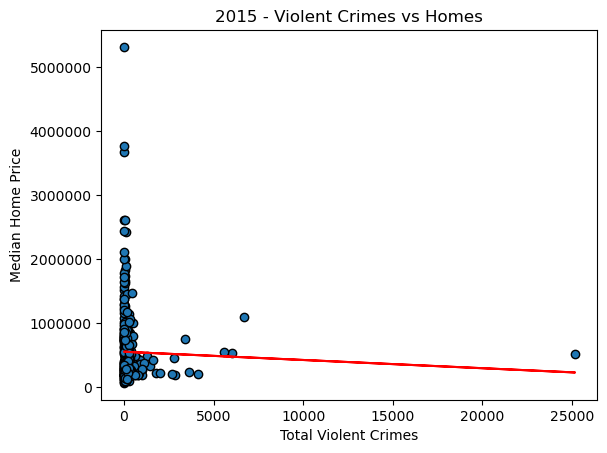

The r-value is: -0.03442022440847449


In [21]:
x_values = result_merged_df_1['2015 Total Violent Crimes']
y_values = result_merged_df_1['2015 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2015 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2015.png")

plt.show()


print(f"The r-value is: {rvalue}")

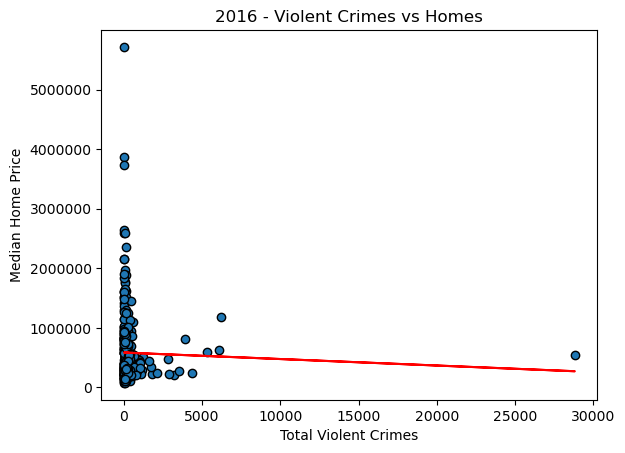

The r-value is: -0.03145001743367437


In [22]:
x_values = result_merged_df_1['2016 Total Violent Crimes']
y_values = result_merged_df_1['2016 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2016 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2016.png")

plt.show()

print(f"The r-value is: {rvalue}")

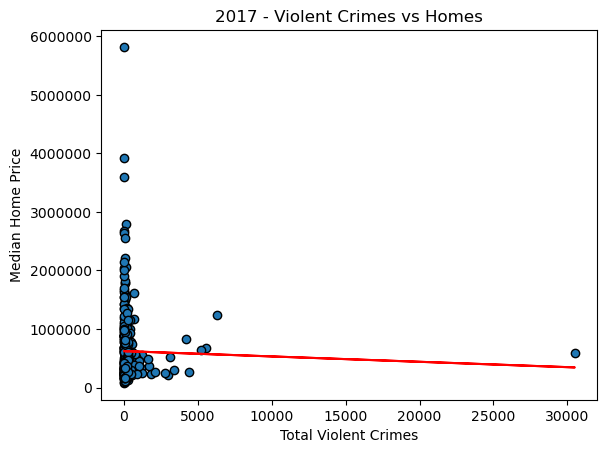

The r-value is: -0.026927196733860195


In [23]:
x_values = result_merged_df_1['2017 Total Violent Crimes']
y_values = result_merged_df_1['2017 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2017 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2017.png")

plt.show()

print(f"The r-value is: {rvalue}")

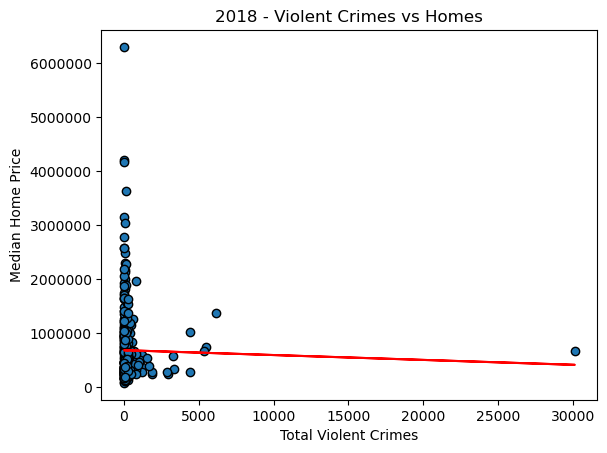

The r-value is: -0.023131419935216082


In [24]:
x_values = result_merged_df_1['2018 Total Violent Crimes']
y_values = result_merged_df_1['2018 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2018 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2018.png")

plt.show()

print(f"The r-value is: {rvalue}")

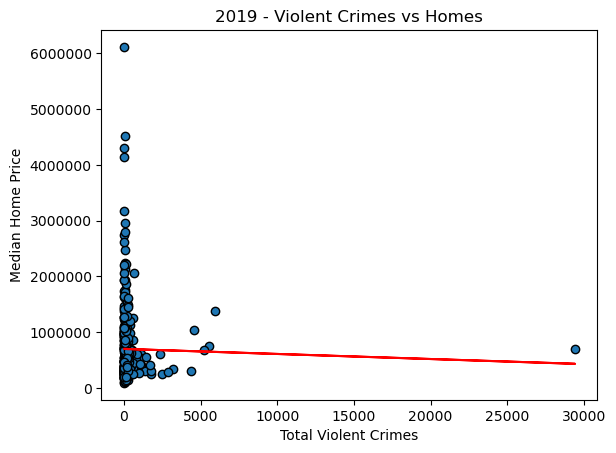

The r-value is: -0.022558532597720417


In [25]:
x_values = result_merged_df_1['2019 Total Violent Crimes']
y_values = result_merged_df_1['2019 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2019 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2019.png")

plt.show()

print(f"The r-value is: {rvalue}")

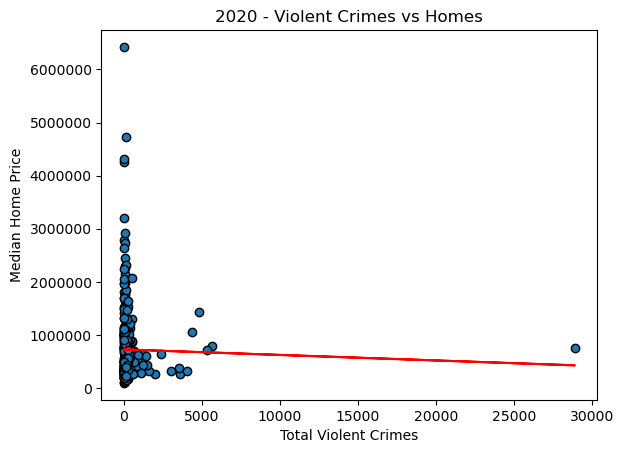

The r-value is: -0.024842857218750933


In [26]:
x_values = result_merged_df_1['2020 Total Violent Crimes']
y_values = result_merged_df_1['2020 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2020 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2020.png")

plt.show()

print(f"The r-value is: {rvalue}")

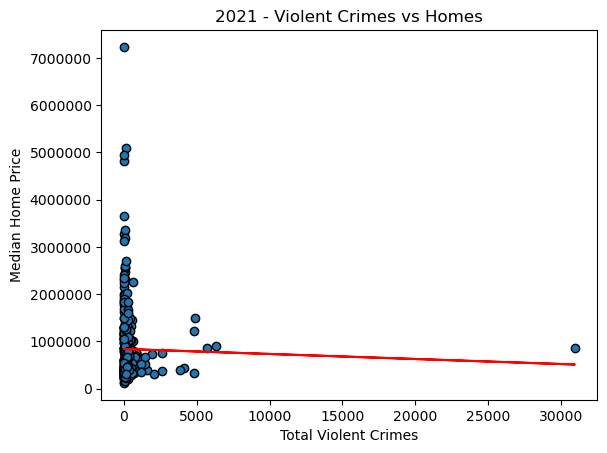

The r-value is: -0.024252483881148944


In [27]:
x_values = result_merged_df_1['2021 Total Violent Crimes']
y_values = result_merged_df_1['2021 Home Prices']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Total Violent Crimes')
plt.ylabel("Median Home Price")
plt.ticklabel_format(style='plain', axis='both')
plt.title("2021 - Violent Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Total2021.png")

plt.show()

print(f"The r-value is: {rvalue}")

In [28]:
x_values = result_merged_df_1['2021 Total Violent Crimes']
y_values = result_merged_df_1['2021 Home Prices']
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is -0.02


In [29]:
## By Rate of Growth

In [30]:
result_merged_df_1["2021 Home Growth (%)"] = ((result_merged_df_1["2021 Home Prices"] - result_merged_df_1["2020 Home Prices"]) / result_merged_df_1["2020 Home Prices"]) * 100
result_merged_df_1["2020 Home Growth (%)"] = ((result_merged_df_1["2020 Home Prices"] - result_merged_df_1["2019 Home Prices"]) / result_merged_df_1["2019 Home Prices"]) * 100
result_merged_df_1["2019 Home Growth (%)"] = ((result_merged_df_1["2019 Home Prices"] - result_merged_df_1["2018 Home Prices"]) / result_merged_df_1["2018 Home Prices"]) * 100
result_merged_df_1["2018 Home Growth (%)"] = ((result_merged_df_1["2018 Home Prices"] - result_merged_df_1["2017 Home Prices"]) / result_merged_df_1["2017 Home Prices"]) * 100
result_merged_df_1["2017 Home Growth (%)"] = ((result_merged_df_1["2017 Home Prices"] - result_merged_df_1["2016 Home Prices"]) / result_merged_df_1["2016 Home Prices"]) * 100
result_merged_df_1["2016 Home Growth (%)"] = ((result_merged_df_1["2016 Home Prices"] - result_merged_df_1["2015 Home Prices"]) / result_merged_df["2015 Home Prices"]) * 100

result_merged_df_1["2021 Crime Growth (%)"] = ((result_merged_df_1["2021 Total Violent Crimes"] - result_merged_df_1["2020 Total Violent Crimes"]) / result_merged_df["2020 Total Violent Crimes"]) * 100
result_merged_df_1["2020 Crime Growth (%)"] = ((result_merged_df_1["2020 Total Violent Crimes"] - result_merged_df_1["2019 Total Violent Crimes"]) / result_merged_df["2019 Total Violent Crimes"]) * 100
result_merged_df_1["2019 Crime Growth (%)"] = ((result_merged_df_1["2019 Total Violent Crimes"] - result_merged_df_1["2018 Total Violent Crimes"]) / result_merged_df["2018 Total Violent Crimes"]) * 100
result_merged_df_1["2018 Crime Growth (%)"] = ((result_merged_df_1["2018 Total Violent Crimes"] - result_merged_df_1["2017 Total Violent Crimes"]) / result_merged_df["2017 Total Violent Crimes"]) * 100
result_merged_df_1["2017 Crime Growth (%)"] = ((result_merged_df_1["2017 Total Violent Crimes"] - result_merged_df_1["2016 Total Violent Crimes"]) / result_merged_df["2016 Total Violent Crimes"]) * 100
result_merged_df_1["2016 Crime Growth (%)"] = ((result_merged_df_1["2016 Total Violent Crimes"] - result_merged_df_1["2015 Total Violent Crimes"]) / result_merged_df["2015 Total Violent Crimes"]) * 100


growth_df = result_merged_df_1[["City","2021 Home Growth (%)","2020 Home Growth (%)","2019 Home Growth (%)",
                             "2018 Home Growth (%)","2017 Home Growth (%)","2016 Home Growth (%)",
                             "2021 Crime Growth (%)","2020 Crime Growth (%)","2019 Crime Growth (%)",
                             "2018 Crime Growth (%)","2017 Crime Growth (%)","2016 Crime Growth (%)"]]

growth_df

C:\Users\Eric\AppData\Local\Temp\ipykernel_11584\3679399574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_merged_df_1["2021 Home Growth (%)"] = ((result_merged_df_1["2021 Home Prices"] - result_merged_df_1["2020 Home Prices"]) / result_merged_df_1["2020 Home Prices"]) * 100
C:\Users\Eric\AppData\Local\Temp\ipykernel_11584\3679399574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_merged_df_1["2020 Home Growth (%)"] = ((result_merged_df_1["2020 Home Prices"] - result_merged_df_1["2019

,City,2021 Home Growth (%),2020 Home Growth (%),2019 Home Growth (%),2018 Home Growth (%),2017 Home Growth (%),2016 Home Growth (%),2021 Crime Growth (%),2020 Crime Growth (%),2019 Crime Growth (%),2018 Crime Growth (%),2017 Crime Growth (%),2016 Crime Growth (%)
0,Adelanto,22.614971,6.653575,6.770741,15.963761,13.731856,7.709799,13.503650,-0.724638,15.481172,0.420168,-13.768116,30.188679
1,Agoura Hills,16.529740,4.702196,0.909530,8.606323,7.283622,0.365557,8.695652,9.523810,-22.222222,68.750000,6.666667,0.000000
2,Alameda,14.890128,3.431823,-3.174102,7.963636,5.982810,11.205158,35.233161,19.135802,-11.956522,-27.272727,67.549669,2.027027
3,Albany,13.290847,2.503995,0.177610,9.716122,6.568777,9.106229,31.034483,-27.500000,8.108108,2.777778,24.137931,-14.705882
4,Alhambra,11.369310,4.109937,4.224409,13.135791,8.482120,0.887666,-4.000000,8.695652,-16.580311,12.209302,17.808219,-13.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Yountville,17.027994,3.959933,3.628529,5.537567,5.924997,7.274866,0.000000,-80.000000,150.000000,100.000000,-75.000000,-42.857143
423,Yreka,18.044156,4.149903,8.721558,7.041460,4.830355,6.012075,52.500000,42.857143,-24.324324,-27.450980,-5.555556,14.893617
424,Yuba City,17.816281,7.475647,4.975056,9.324776,11.242170,8.055360,33.057851,0.414938,-8.712121,3.529412,-6.250000,25.925926
425,Yucaipa,16.741075,5.438248,1.939226,11.037952,10.162324,5.570577,16.993464,-23.500000,98.019802,36.486486,-34.513274,20.212766


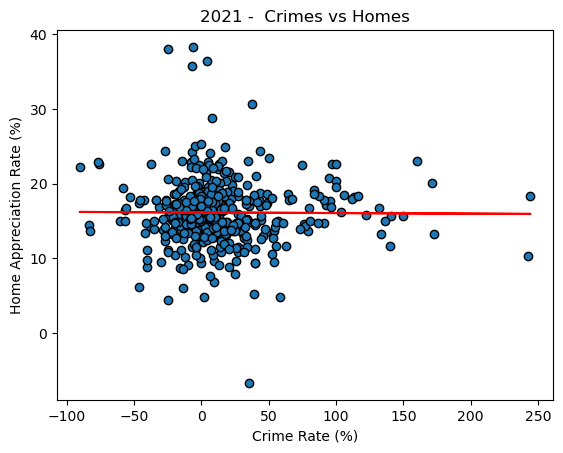

The r-value is: -0.007464928855443552


In [31]:
x_values = growth_df['2021 Crime Growth (%)']
y_values = growth_df['2021 Home Growth (%)']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("2021 -  Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Percent2021.png")

plt.show()

print(f"The r-value is: {rvalue}")

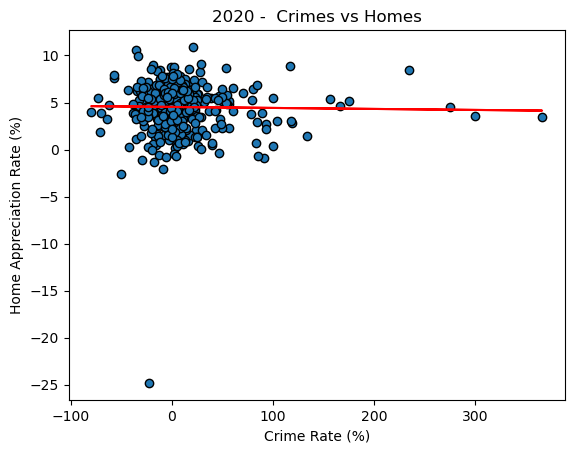

The r-value is: -0.017483366430270323


In [32]:
x_values = growth_df['2020 Crime Growth (%)']
y_values = growth_df['2020 Home Growth (%)']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("2020 -  Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Percent2020.png")

plt.show()

print(f"The r-value is: {rvalue}")

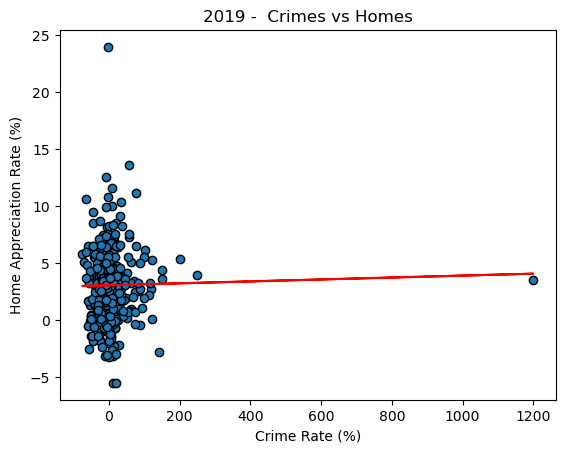

The r-value is: 0.0192617648706765


In [33]:
x_values = growth_df['2019 Crime Growth (%)']
y_values = growth_df['2019 Home Growth (%)']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("2019 -  Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Percent2019.png")

plt.show()

print(f"The r-value is: {rvalue}")

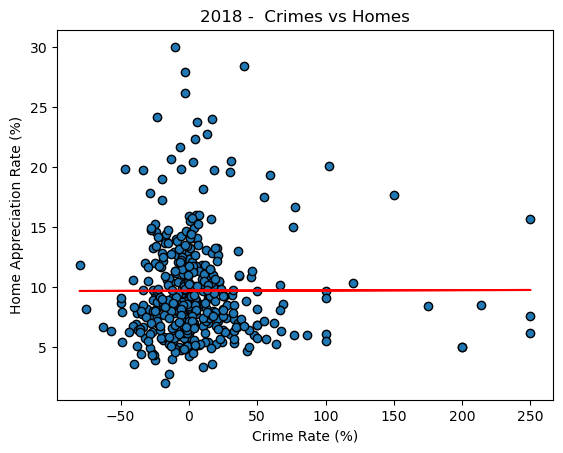

The r-value is: 0.002408758758496971


In [34]:
x_values = result_merged_df_1['2018 Crime Growth (%)']
y_values = result_merged_df_1['2018 Home Growth (%)']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("2018 -  Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Percent2018.png")

plt.show()

print(f"The r-value is: {rvalue}")

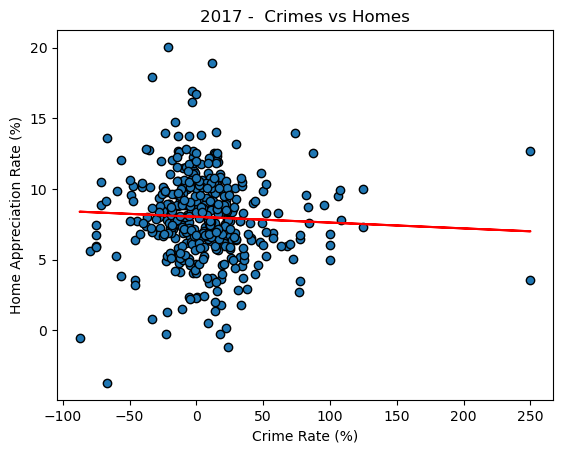

The r-value is: -0.04869437374499878


In [35]:
x_values = result_merged_df_1['2017 Crime Growth (%)']
y_values = result_merged_df_1['2017 Home Growth (%)']
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("2017 -  Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Percent2017.png")

plt.show()

print(f"The r-value is: {rvalue}")

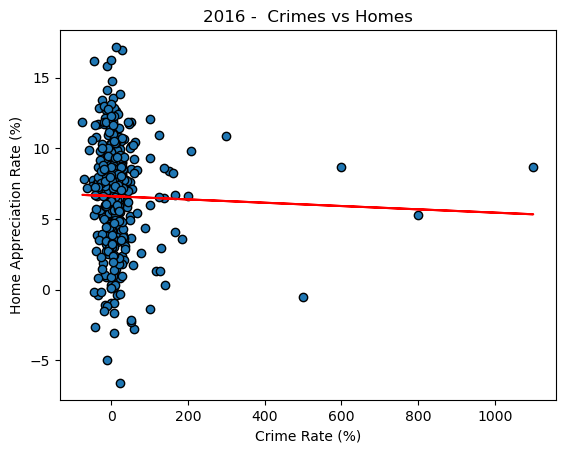

The r-value is: -0.027153133037658025


In [36]:
x_values = result_merged_df_1['2016 Crime Growth (%)']
y_values = result_merged_df_1['2016 Home Growth (%)']
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("2016 -  Crimes vs Homes")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
plt.savefig("Plots/Percent2016.png")

plt.show()

print(f"The r-value is: {rvalue}")

In [37]:
#walnut Creek

In [38]:
wc = result_merged_df_1[result_merged_df_1["City"] =="Walnut Creek"]

C:\Users\Eric\anaconda3\envs\dev\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Eric\anaconda3\envs\dev\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


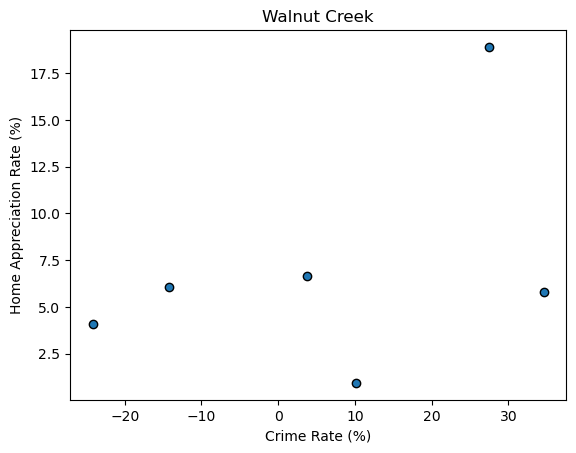

The r-value is: 0.43383006622854975


In [39]:
x_values = wc[['2016 Crime Growth (%)', '2017 Crime Growth (%)', '2018 Crime Growth (%)', '2019 Crime Growth (%)', '2020 Crime Growth (%)', '2021 Crime Growth (%)']]
y_values = wc[['2016 Home Growth (%)', '2017 Home Growth (%)', '2018 Home Growth (%)', '2019 Home Growth (%)', '2020 Home Growth (%)', '2021 Home Growth (%)']]
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel('Crime Rate (%)')
plt.ylabel("Home Appreciation Rate (%)")
plt.title("Walnut Creek")


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


y = slope * x_values + intercept

#plot the scatter plot
plt.plot(x_values,y,"-", color='r')
#plt.savefig("Plots/Percent2016.png")

plt.show()

print(f"The r-value is: {rvalue}")